


# Data Analysis



The data is comprised of two csv files - `matches.csv` and `ball_by_ball.csv`. The two files will be explored to understand the make up and distribution of each of the columns.

`matches.csv` contains one row for each of the IPL matches from 2008-2020 with pre game information such as city, venue, toss decision, toss winner, home team, and away team as well as some other columns. This data will be inspected and any rows that are deemed to be irrelelavant for this prediction task will be dropped. 

`ball_by_ball.csv` contains a row for every ball bowled in the history of the IPL from 2008-2020. This dataset will be used to calculate summary statistics for various stages of each game as it contains runs scored and wickets taken for each ball bowled.

## Import packages

In [65]:
#importing all required dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None
import matplotlib.ticker as mtick

In [66]:
matches = pd.read_csv('matches.csv')

In [67]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [68]:
matches.shape

(816, 17)

It can be seen that the matches dataset contains 816 rows representing all 816 matches from 2008-2020. It has 17 columns. The columns will be inspected to understand what will be used for the predicitive analysis and to gain a better understanding of the distribution within the columns. Some short analysis will also be run on the various columns to gain an insight into what factors may improve our predictive analysis

## Null Values

In [69]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

The method column has 19 non null values and these are due to games where the result was decided by Duckworth Lewis Stern (DLS) method. The use of DLS is in the case where there is inclement weather which shortens the period of play. It aims to recalculate the required total or determine the winner based on resources available at the point when the game is stopped by the resulting weather. These games will be kept in our dataset for now and removed at a later date.

There are 4 rows of NA values for winner, player_of_match and result columns. This is due to these games being cancelled and therefore no result being possible. These 4 games will be dropped from our data set and it is noted to do the same for the `ball_by_ball` dataset.

In [70]:
no_result = matches[matches.result.isnull()]
no_result.id.value_counts()

501265     1
829763     1
829813     1
1178424    1
Name: id, dtype: int64

## ID's

These match ID's will be needed to remove data from the `ball_by_ball` dataset below, so that only completed games are being used in the analysis.

In [71]:
matches = matches[matches.result.notnull()]
matches.shape

(812, 17)

The dataframe has been reduced to 812 matches which all have results.

The 13 NA's for the city column will be inspected below.

In [72]:
temp = matches[matches.city.isnull()]
temp

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,NaN,M Erasmus,S Ravi
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,N,NaN,M Erasmus,S Ravi
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,BF Bowden,M Erasmus
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni


These NA values for the city column are all due to games played in the United Arab Emirates (UAE) during the 2014 season. The city column will be edited to Dubai or Sharjah as appropriate

In [73]:
sharjah = matches.venue == 'Sharjah Cricket Stadium'
dubai = matches.venue == 'Dubai International Cricket Stadium'
target = 'city'
matches.loc[sharjah, target] = 'Sharjah'
matches.loc[dubai, target] = 'Dubai'

In [74]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               812 non-null    int64  
 1   city             812 non-null    object 
 2   date             812 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            812 non-null    object 
 5   neutral_venue    812 non-null    int64  
 6   team1            812 non-null    object 
 7   team2            812 non-null    object 
 8   toss_winner      812 non-null    object 
 9   toss_decision    812 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          812 non-null    object 
 16  umpire2          812 non-null    object 
dtypes: float64(1), i

It can be seen the City column no longer contains any null values

## City

In [75]:
matches.city.value_counts()

Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Dubai              33
Abu Dhabi          29
Sharjah            18
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Cuttack             7
Ranchi              7
Port Elizabeth      7
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64



Mumbai has hosted the most games followed by Kolkata, Delhi, Hyderabad, and Bangalore. The lower end of the scale is dominated by South African cities such as Bloemfontein and East London as well as Indian cities that housed a franchise for a single season.

The presence of South African cities is due to the fact that the IPL was played in South Africa for the 2009 and 2014 season.

## Venue

In [76]:
matches.venue.value_counts()

Eden Gardens                                            77
Feroz Shah Kotla                                        73
Wankhede Stadium                                        73
Rajiv Gandhi International Stadium, Uppal               64
M Chinnaswamy Stadium                                   63
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
M.Chinnaswamy Stadium                                   



The distribution of games across venues follows that of cities with the majority of highly used venues representing the teams that played all seasons while the lesser used venues being due to seasons in South Africa, UAE, or due to a franchise that didn't play every season of the IPL

## Winner

In [77]:
matches.winner.value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


It can be seen that the Mumbai Indians are the most successful team in terms of wins, closely followed by Chennai Super Kings and the Kolkata Knight Riders. This ties in well with the fact that the title wins are:

| Team      | Titles | Year |
| ----------- | ----------- | :-------------: |
| Mumbai Indians     | 5       | 2013, 2015, 2017, 2019, 2020 |
| Chennai Super Kings  | 3        | 2010, 2011, 2018 |
| Kolkata Knight Riders | 2     | 2012, 2014 |

It is noted that not all teams have played all editions of the IPL:
- Gujarat Lions played 2 seasons (2016-2017) as replacement for the banned Chennai Super Kings and Rajastan Royals
- Rising Pune Supergiant played 2 seasons (2016-2017) as replacement for Chennai/Rajastan also.
- Pune Warriors played 3 seasons (2011-2013)
- Kochi Tuskers Kerala played 1 season (2011)
- Deccan Chargers played 5 seasons (2008-2012)
- Sunrisers Hyderabad played 8 seasons (2013-2020)

All other teams have played all 13 seasons. It can be seen from the data that a typo has Rising Pune Supergiant split into two values (Rising Pune Supergiant(s)) so this will be rectified below.

In [78]:
# replace all values of Rising Pune Supergiants with Rising Pune Supergiant
matches.loc[matches.winner == 'Rising Pune Supergiants', 'winner'] = 'Rising Pune Supergiant'
matches.loc[matches.team1 == 'Rising Pune Supergiants', 'team1'] = 'Rising Pune Supergiant'
matches.loc[matches.team2 == 'Rising Pune Supergiants', 'team2'] = 'Rising Pune Supergiant'
matches.loc[matches.toss_winner == 'Rising Pune Supergiants', 'toss_winner'] = 'Rising Pune Supergiant'

Delhi Daredevils changed their name to Delhi Capitals in 2018 and so for the predictive analysis, all names will be changed from Delhi Daredevils to Delhi Capitals. Any reference to Delhi Capitals will include all performances of the Dehli Daredevlis from 2008-2018.

In [79]:
# replace all values of Delhi Daredevils with Delhi Capitals
matches.loc[matches.winner == 'Delhi Daredevils', 'winner'] = 'Delhi Capitals'
matches.loc[matches.team1 == 'Delhi Daredevils', 'team1'] = 'Delhi Capitals'
matches.loc[matches.team2 == 'Delhi Daredevils', 'team2'] = 'Delhi Capitals'
matches.loc[matches.toss_winner == 'Delhi Daredevils', 'toss_winner'] = 'Delhi Capitals'

In [80]:
matches.winner.value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Delhi Capitals                  86
Rajasthan Royals                81
Sunrisers Hyderabad             66
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

All typos and split spellings have been consolidated so it represents each of the teams correctly.

## Toss

The toss will now be inspected to understand if it may be a factor in the end result and therefore whether it may aid the predictive analysis.

In [81]:
matches['year']= matches.date.str[0:4]
d = matches.toss_decision.value_counts()
d

field    493
bat      319
Name: toss_decision, dtype: int64

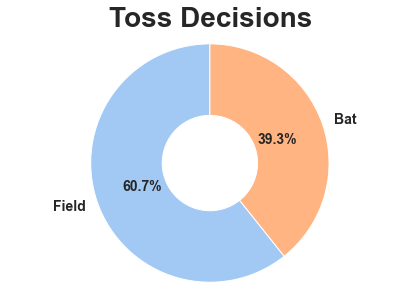

In [82]:
#create a pie chart to represent the choices of the team having won the toss
sns.set_theme(style="darkgrid",palette="pastel")
fig1, ax1 = plt.subplots()
ax1.pie(d, labels=['Field', 'Bat'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14, 'fontweight' : "bold"})
#draw circle
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Toss Decisions',size=28,fontweight="bold")
plt.show()

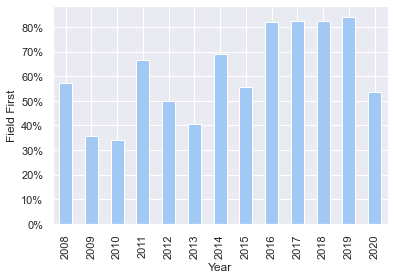

In [126]:
yearly_tosses = matches.groupby('year')['toss_decision'].value_counts(1).sort_index(ascending=True)

yearly_tosses = yearly_tosses.filter(like='field', axis=0).to_frame()
ax = yearly_tosses.plot.bar()
x = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
ax.set_ylabel('Field First')
ax.set_xlabel('Year')
#ax.set_title('Percentage of Field First Choices',size=26,fontweight="bold")
#ax.set_xticks(x)
ax.set_xticklabels(x,)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=None))
ax.get_legend().remove()
plt.savefig('field_first_yearly.png',dpi=300, bbox_inches = "tight")

It is clear that there is a preference towards bowling first (choosing to field) as that is the choice of the team winning the toss 60.7% of the time vs 39.3% when teams choose to bat. This trend appears to have increased over the years with 2016-2019 heavily favouring fielding first (80%+). The choices of each of the teams is now inspected to determine if there is a specific preference for individual teams or whether this trend is across all teams.

In [84]:
toss_info = []
teams = ["Mumbai Indians","Chennai Super Kings","Kolkata Knight Riders","Royal Challengers Bangalore","Kings XI Punjab","Delhi Capitals","Rajasthan Royals","Sunrisers Hyderabad","Deccan Chargers","Rising Pune Supergiant","Gujarat Lions","Pune Warriors","Kochi Tuskers Kerala"]
for team in teams:
    temp = matches[matches.toss_winner==team]
    #df = temp.toss_decision.value_counts().rename_axis('choice').reset_index(name='counts')
    #print (team, df)
    percent = (temp.toss_decision.value_counts().sort_index()[0])/(temp.toss_decision.value_counts().sort_index()[0]+temp.toss_decision.value_counts().sort_index()[1])
    #team, percent bat, percent bowl
    #print(team, percent, 1-percent)
    toss_info.append([team, percent, 1-percent, temp.toss_decision.value_counts()[0]+temp.toss_decision.value_counts()[1]])

df4 = pd.DataFrame(toss_info, columns=['team','bat_percentage','field_percentage', 'tosses_won'])
df4 = df4.sort_values(by=['field_percentage'],ascending=False)
df4


,team,bat_percentage,field_percentage,tosses_won
10,Gujarat Lions,0.066667,0.933333,15
9,Rising Pune Supergiant,0.230769,0.769231,13
3,Royal Challengers Bangalore,0.279070,0.720930,86
4,Kings XI Punjab,0.317647,0.682353,85
2,Kolkata Knight Riders,0.346939,0.653061,98
5,Delhi Capitals,0.353535,0.646465,99
12,Kochi Tuskers Kerala,0.375000,0.625000,8
6,Rajasthan Royals,0.400000,0.600000,85
7,Sunrisers Hyderabad,0.421053,0.578947,57
0,Mumbai Indians,0.452830,0.547170,106


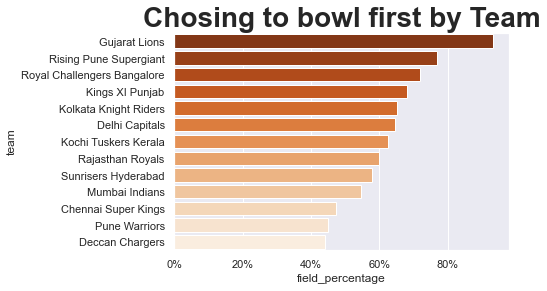

In [85]:
#plot choices by each team
ax = sns.barplot(x="field_percentage", y="team", data=df4 ,palette="Oranges_r")
plt.title('Chosing to bowl first by Team',size=28,fontweight="bold")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=None))

There is a trend across a number of teams that have a strong preference towards fielding first and batting second. The Gujarat Lions and Rising Pune Supergiant chose to field 93% and 76% of the time respectively, although this was across a small number of games. The Royal Challengers Bangalore, Kings XI Punjab, Kolkata Knight Riders, and Delhi Capitals have a strong preference towards fielding 64%-72% across a larger quantity of games. The Chennai Super Kings, Pune Warriors and Deccan Chargers are the only teams that have a preference towards batting first.

The relationship between winning the toss and winning the game will now be explored

In [86]:
d = matches.result.value_counts()
d

wickets    435
runs       364
tie         13
Name: result, dtype: int64

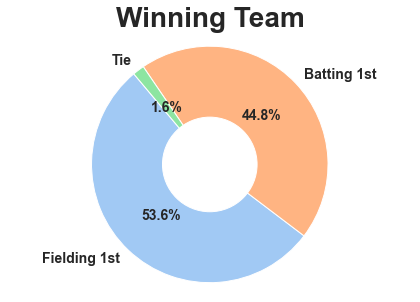

In [87]:
#create a pie chart to represent the winning team and what they did first
fig1, ax1 = plt.subplots()
ax1.pie(d, labels=['Fielding 1st', 'Batting 1st', 'Tie'], autopct='%1.1f%%', startangle=130, textprops={'fontsize': 14, 'fontweight' : "bold"})
#draw circle
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Winning Team',size=28,fontweight="bold")
plt.show()

In [88]:
yearly_results = matches.groupby('year')['result'].value_counts(1).sort_index(ascending=True)

In [89]:
yearly_wickets_wins = yearly_results.filter(like='wickets', axis=0).to_frame()

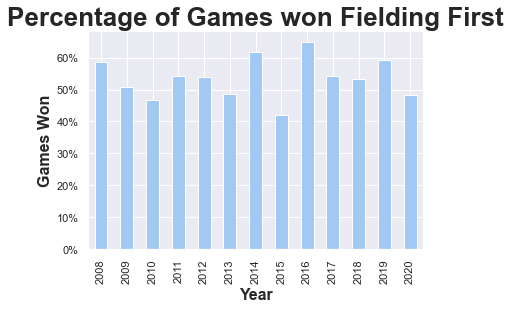

In [90]:
ax = yearly_wickets_wins.plot.bar()

x = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
ax.set_ylabel('Games Won',size=16,fontweight="bold")
ax.set_xlabel('Year',size=16,fontweight="bold")
ax.set_title('Percentage of Games won Fielding First',size=26,fontweight="bold")
#ax.set_xticks(x)

ax.set_xticklabels(x,)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=None))
ax.get_legend().remove()

These graphs give an insight into IPL trends. Teams chose to field first 60.7% of the time and the winner is the fielding team 53.6% of the time. Therefore, fielding first and batting second gives a small competitive advantage and confirms our belief that winning the toss can provide teams with a marginal competitve advantage. This relationship will be explored further below.

In [91]:
toss = matches[['toss_winner', 'winner', 'toss_decision', 'result']]
toss

,toss_winner,winner,toss_decision,result
0,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs
1,Chennai Super Kings,Chennai Super Kings,bat,runs
2,Rajasthan Royals,Delhi Capitals,bat,wickets
3,Mumbai Indians,Royal Challengers Bangalore,bat,wickets
4,Deccan Chargers,Kolkata Knight Riders,bat,wickets
...,...,...,...,...
811,Mumbai Indians,Royal Challengers Bangalore,field,tie
812,Delhi Capitals,Mumbai Indians,field,runs
813,Sunrisers Hyderabad,Sunrisers Hyderabad,field,wickets
814,Delhi Capitals,Delhi Capitals,bat,runs


The incidence of winning the toss and subsequently winning the game will be explored to understand how much of a competitive advantage winning the toss can be.

In [92]:
toss['won_toss_won_game'] = np.where(toss.toss_winner == toss.winner, 1, 0)
toss

,toss_winner,winner,toss_decision,result,won_toss_won_game
0,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,0
1,Chennai Super Kings,Chennai Super Kings,bat,runs,1
2,Rajasthan Royals,Delhi Capitals,bat,wickets,0
3,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,0
4,Deccan Chargers,Kolkata Knight Riders,bat,wickets,0
...,...,...,...,...,...
811,Mumbai Indians,Royal Challengers Bangalore,field,tie,0
812,Delhi Capitals,Mumbai Indians,field,runs,0
813,Sunrisers Hyderabad,Sunrisers Hyderabad,field,wickets,1
814,Delhi Capitals,Delhi Capitals,bat,runs,1


In [93]:
d = toss.won_toss_won_game.value_counts()
d

1    418
0    394
Name: won_toss_won_game, dtype: int64

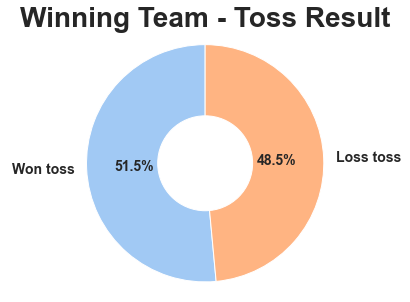

In [94]:
fig1, ax1 = plt.subplots()
ax1.pie(d, labels=['Won toss', 'Loss toss'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14, 'fontweight' : "bold"})
#draw circle
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Winning Team - Toss Result',size=28,fontweight="bold")
plt.show()

Interestingly winning the toss doesn't give as much of a competitive advantage as previously believed towards winning. The cases of winning the toss and bowling and winning the toss and batting will now be inspected.

To do this we will calculate separate fields once again for each.

In [95]:
#create a dataframe for each scenario
toss_won_and_field = toss[toss.toss_decision == 'field']
toss_won_and_bat = toss[toss.toss_decision == 'bat']

In [96]:
d = toss_won_and_field.won_toss_won_game.value_counts()
d

1    273
0    220
Name: won_toss_won_game, dtype: int64

In [97]:
e = toss_won_and_bat.won_toss_won_game.value_counts(ascending=True)
e

1    145
0    174
Name: won_toss_won_game, dtype: int64

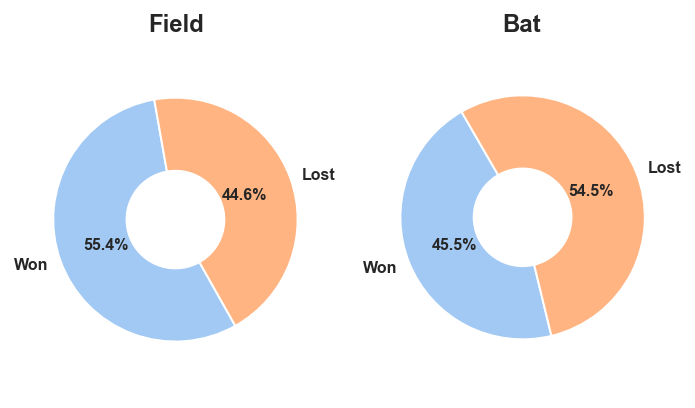

In [123]:
# figure for both subplots
fig = plt.figure(figsize=(5,3),dpi=144)
ax1 = fig.add_subplot(121)

# plot the first pie chart in ax1
ax1.pie(d, labels=['Won', 'Lost'], autopct='%1.1f%%', startangle=100, textprops={'fontsize': 8, 'fontweight' : "bold"})
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax2 = fig.add_subplot(122)

# plot the second pie chart in ax2
ax2.pie(e, labels=['Won', 'Lost'], autopct='%1.1f%%', startangle=120, textprops={'fontsize': 8, 'fontweight' : "bold"})
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#plt.suptitle("Won the toss and chose to:",size=18,fontweight="bold")
ax1.axis('equal')
ax1.set_title('Field', fontweight="bold")
ax2.set_title('Bat', fontweight="bold")
ax2.axis('equal')
plt.tight_layout()
plt.savefig('won_toss_choice_comparison.png',dpi=300, bbox_inches = "tight")
plt.show()

This investigation into the toss has highlighted some key facts:

- Teams will more often than not choose to bowl first - 60.7% of the time
- When teams win the toss and choose to bowl they win 55.4% of games
- When teams win the toss and choose to bat they win 45.5% of games


## Home team advantage

The dataframe will be filtered to understand whether playing at home will give a greater chance of winning the game. A dataframe will be created and filtered to remove all games that have been played at a neutral venue

In [99]:
home_advantage = matches[['team1', 'team2', 'winner', 'toss_winner', 'toss_decision', 'neutral_venue']]
home_advantage = home_advantage[home_advantage.neutral_venue == 0]
home_advantage['home_win'] = np.where(home_advantage.team1 == home_advantage.winner, 1, 0)
home_advantage

,team1,team2,winner,toss_winner,toss_decision,neutral_venue,home_win
0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bangalore,field,0,0
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,bat,0,0
2,Delhi Capitals,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,0,1
3,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,Mumbai Indians,bat,0,0
4,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,0,1
...,...,...,...,...,...,...,...
811,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,0,1
812,Mumbai Indians,Delhi Capitals,Mumbai Indians,Delhi Capitals,field,0,1
813,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,field,0,0
814,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,bat,0,1


In [100]:
home_adv = home_advantage.home_win.value_counts()
home_adv

1    406
0    329
Name: home_win, dtype: int64

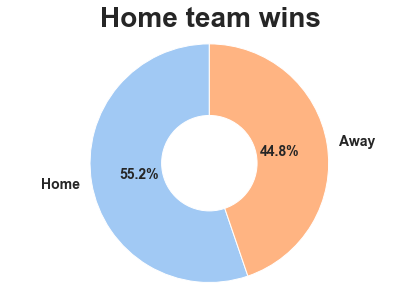

In [101]:
fig1, ax1 = plt.subplots()
ax1.pie(home_adv, labels=['Home', 'Away'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14, 'fontweight' : "bold"})
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Home team wins',size=28,fontweight="bold")
plt.show()

This indicates that the home team has an advantage over the away team, as expected. The data will be inspected for each of the teams to understand if this trend occurs for all teams or whether certain franchises have developed a 'fortress' at home that is more likely to result in a home win

In [102]:
wins = []
teams = ["Mumbai Indians","Chennai Super Kings","Kolkata Knight Riders","Royal Challengers Bangalore","Kings XI Punjab","Delhi Capitals","Rajasthan Royals","Sunrisers Hyderabad","Deccan Chargers","Rising Pune Supergiant","Gujarat Lions","Pune Warriors","Kochi Tuskers Kerala"]
for team in teams:
    away = home_advantage[home_advantage.team2==team]
    home = home_advantage[home_advantage.team1==team]
    #df = temp.home_win.value_counts().rename_axis('choice').reset_index(name='counts')
    #print (team, df)
    percent_home = (home.home_win.value_counts().sort_index()[1])/(home.home_win.value_counts().sort_index()[0]+home.home_win.value_counts().sort_index()[1])
    percent_away = (away.home_win.value_counts().sort_index()[0])/(away.home_win.value_counts().sort_index()[0]+away.home_win.value_counts().sort_index()[1])
    #team, percent bat, percent bowl
    #print(team, percent, 1-percent)
    wins.append([team, percent_home, 1-percent_home, percent_away, 1-percent_away, home.home_win.value_counts()[0]+home.home_win.value_counts()[1], away.home_win.value_counts()[0]+away.home_win.value_counts()[1]])

df4 = pd.DataFrame(wins, columns=['team','home_win','home_loss', 'away_win', 'away_loss', 'home_games', 'away_games'])
df4 = df4.sort_values(by=['home_win'],ascending=False)
df4['home_away_diff'] = df4.home_win-df4.away_win
df4



,team,home_win,home_loss,away_win,away_loss,home_games,away_games,home_away_diff
1,Chennai Super Kings,0.700000,0.300000,0.481013,0.518987,80,79,0.218987
0,Mumbai Indians,0.648936,0.351064,0.593407,0.406593,94,91,0.055530
7,Sunrisers Hyderabad,0.642857,0.357143,0.444444,0.555556,56,63,0.198413
6,Rajasthan Royals,0.641791,0.358209,0.391892,0.608108,67,74,0.249899
2,Kolkata Knight Riders,0.613636,0.386364,0.465116,0.534884,88,86,0.148520
9,Rising Pune Supergiant,0.500000,0.500000,0.500000,0.500000,14,16,0.000000
3,Royal Challengers Bangalore,0.494253,0.505747,0.440476,0.559524,87,84,0.053777
4,Kings XI Punjab,0.488095,0.511905,0.402299,0.597701,84,87,0.085796
5,Delhi Capitals,0.477778,0.522222,0.378049,0.621951,90,82,0.099729
12,Kochi Tuskers Kerala,0.428571,0.571429,0.428571,0.571429,7,7,0.000000


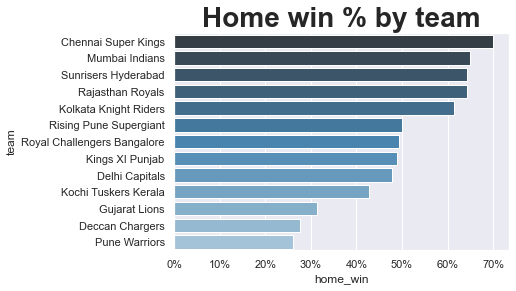

In [103]:
# Plot Home win % by team
ax = sns.barplot(x="home_win", y="team", data=df4 ,palette="Blues_r_d")
plt.title('Home win % by team',size=28,fontweight="bold")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=None))

Five teams have a win % above 50% at home. These are Chennai Super Kings, Mumbai Indians, Sunrisers Hyderabad, Rajastan Royals, and the Kolkata Knight Riders. To understand if this is a trend for only home games, the away record of these teams will also be inspected now.

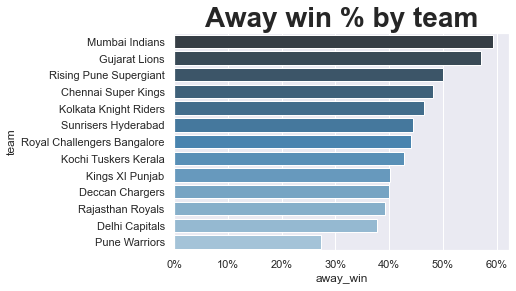

In [104]:
#sort by away wins
df4 = df4.sort_values(by=['away_win'],ascending=False)

ax = sns.barplot(x="away_win", y="team", data=df4, palette="Blues_r_d")
plt.title('Away win % by team',size=28,fontweight="bold")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=None))

The Mumbai Indians and the Gujarat Lions are the only teams to have a away win % higher than 50%. Mumbai Indians have the record with 59% away wins. At the other end of the table is Pune Warriors and Delhi Capitals. Rajastan Royals are 3rd from the bottom with an away win at 39%. The relationship between home wins anmd away wins will now be inspected to see what the variety of success is for teams in both situations.

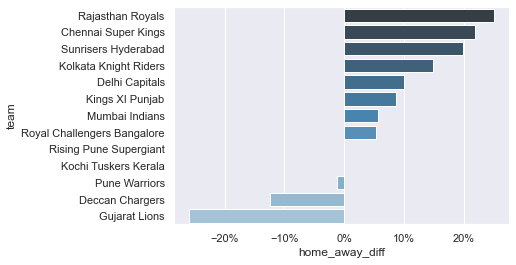

In [124]:
df4 = df4.sort_values(by=['home_away_diff'],ascending=False)

ax = sns.barplot(x="home_away_diff", y="team", data=df4 ,palette="Blues_r_d")
#plt.title('Difference in home/away win %',size=28,fontweight="bold")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=None))
ax.figure.savefig('home_away_win_diff.png',dpi=300, bbox_inches = "tight")

Interestingly, there are 3 teams with a negative relationship with their home games. These are the Pune Warriors, Deccan Chargers and Gujarat Lions who have a better win % away than at home. At the top of the scale are the Rajastan Royals who have a 64% win rate at home but this drops to a 39% win rate when playing away from home. This graph would suggest a competitve advantage due to playing at home but it also indicates that certain teams performance varies greatly from home to away while others are less affected by this.

## Result Margin

In [106]:
matches.eliminator.value_counts()

N    799
Y     13
Name: eliminator, dtype: int64

In [107]:
matches.result_margin.value_counts()

6.0      95
7.0      94
5.0      85
8.0      67
4.0      53
         ..
42.0      1
47.0      1
87.0      1
130.0     1
69.0      1
Name: result_margin, Length: 91, dtype: int64

The 13 ties which result in an eliminator have the value NaN for result Margin. These NaN values are changed to 0 below

In [108]:
#replace all null values with 0
matches.result_margin = matches.result_margin.fillna(0)

#split data into results by runs and wickets to visualise separately
results_wickets = matches[matches.result == 'wickets']
results_runs = matches[matches.result == 'runs']

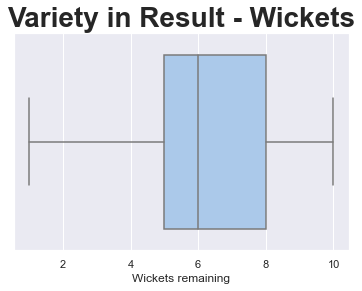

In [109]:
ax = sns.boxplot(x="result_margin", data=results_wickets)
ax.set(xlabel='Wickets remaining')
plt.title('Variety in Result - Wickets',size=28,fontweight="bold")
plt.show()

The average successful run chase results in the loss of 4 wickets (i.e. 6 wickets remaining and a victory by 6 wickets). The interquartile range here is between 5-8 wickets remaining.

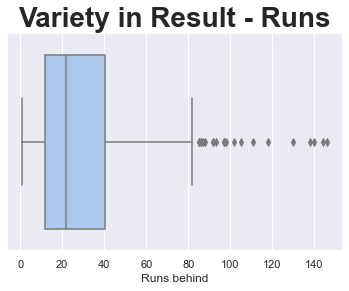

In [110]:
ax = sns.boxplot(x="result_margin", data=results_runs)
ax.set(xlabel='Runs behind')
plt.title('Variety in Result - Runs',size=28,fontweight="bold")
plt.show()

It can be seen the distribution of result margin when a team is bowling second and wins is shown above. It is centered above 0 and the 75th percentile is < 40 runs. There are some outliers as high as a 140+ run victory. Overall it shows the competitve nature of the IPL with most sucessful teams defending a score within 10-40 runs of their total

## Country

A country column will be added as this may help our predictive classifier.

In [111]:
ind = ['Mumbai', 'Kolkata', 'Delhi', 'Hyderabad', 'Bangalore', 'Chennai', 'Chandigarh', 'Jaipur', 'Pune', 'Bengaluru', 'Visakhapatnam', 'Ahmedabad', 'Rajkot', 'Dharamsala', 'Cuttack', 'Indore', 'Ranchi', 'Raipur', 'Kochi', 'Kanpur', 'Nagpur']
uae = ['Dubai', 'Abu Dhabi', 'Sharjah']
sa = ['Durban', 'Centurion', 'Port Elizabeth', 'Johannesburg', 'Cape Town', 'Kimberley', 'East London', 'Bloemfontein']

In [112]:
for city in ind:
    matches.loc[(matches['city'] == city), 'country'] = 'India'  

for city in uae:
    matches.loc[(matches['city'] == city), 'country'] = 'UAE'
    
for city in sa:
    matches.loc[(matches['city'] == city), 'country'] = 'South Africa'
        
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,country
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,India
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,India
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,India
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,India
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,0.0,Y,NaN,Nitin Menon,PR Reiffel,2020,UAE
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020,UAE
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020,UAE
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020,UAE


In [113]:
matches.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'year',
       'country'],
      dtype='object')

## Remaining columns analysis

Neutral venue counts, matches decided by DLS method, and counts of matches that were eliminators (ended in a tie after the 20 overs) are reported below.

In [114]:
matches.neutral_venue.value_counts()

0    735
1     77
Name: neutral_venue, dtype: int64

In [115]:
matches.method.value_counts()

D/L    19
Name: method, dtype: int64

In [116]:
matches.result.value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

It can be seen that 19 games were rain affected and finished with the help of the Duckworth Lewis method (D/L). These games will have a reduced total and so it is difficult for the model to learn from this data. There are also 13 tie games and these will also be removed.

In the D/L situation, for example - team A may score 200 runs and the game is reduced by 50% after some inclement weather. Team B will be set 100 runs to win in half the time. If Team B succesfully chases this score in half the time the data that the model learns from will be altered, reducing the capability of prediction on normally completed games. Since this occurs in 19 games it has been decided to drop these games to improve the performance of the classifier in the instance of all other games which finished without the use of D/L.

## D/L affected games and tied games removal


In [117]:
# find D/L affected matches by id and create an array with these id's
dl_result = matches[matches.method=='D/L']
dl_result.id.value_counts()
dl = dl_result.id.unique()
dl

array([ 336022,  336025,  392183,  392186,  392214,  501215,  501245,
        501255,  733993,  829743,  829807,  980943,  980989,  980997,
        980999, 1082648, 1136566, 1136578, 1136592])

In [118]:
# find tied matches by id and create an array with these id's
tie_result = matches[matches.result=='tie']
tie_result.id.value_counts()
tie = tie_result.id.unique()
tie

array([ 392190,  419121,  598004,  598017,  729315,  829741, 1082625,
       1175365, 1178426, 1216493, 1216512, 1216517, 1216547])

In [119]:
# edit the matches dataframe to remove D/L affected matches and tied matches
matches = matches[~matches.id.isin(dl)]
matches = matches[~matches.id.isin(tie)]

In [120]:
# remove unwanted columns
matches.drop(['umpire1', 'umpire2', 'method', 'eliminator', 'player_of_match'], axis=1, inplace=True)

In [121]:
matches

,id,city,date,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,year,country
0,335982,Bangalore,2008-04-18,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,2008,India
1,335983,Chandigarh,2008-04-19,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,2008,India
2,335984,Delhi,2008-04-19,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,2008,India
3,335985,Mumbai,2008-04-20,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,2008,India
4,335986,Kolkata,2008-04-20,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,2008,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,1216546,Dubai,2020-10-20,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Kings XI Punjab,wickets,5.0,2020,UAE
812,1237177,Dubai,2020-11-05,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,2020,UAE
813,1237178,Abu Dhabi,2020-11-06,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,2020,UAE
814,1237180,Abu Dhabi,2020-11-08,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,2020,UAE


In [122]:
matches.to_csv('cleaned_data.csv')

The matches data has been cleaned and no result, D/L affected and tie games have been removed. This results in 780 games to be analysed and used for the predictive model.

## Deliveries Analysis

The `deliveries` csv file will now be inspected. This file will require less analysis as it contains no summary data within which trends can be explored. This will involve inspection of the data to ensure it is suitable for use in our data transformation in the next stage of this project.

In [59]:
deliveries = pd.read_csv('ball_by_ball.csv')

In [60]:
deliveries

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [61]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

The deliveries data contains a row for every ball bowled in all seasons of the IPL. It contains records for 193,468 balls within 18 columns. Each ball is documented with info on what stage of the game the ball was bowled (id, inning, over, ball), what players were involved in that specific ball (batsman, non_striker, bowler, fielder), and also what happened on that specific ball (batsman_runs, extra_runs, total_runs, is_wicket etc.) while also retaining info on which team is batting and which is bowling (batting_team, bowling_team)

In [62]:
deliveries.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


The distribution of values is as expected. It is noted that 9 balls were bowled in a specific over (max(ball)=9) and the maximum runs off a single delivery was 7. 

In [63]:
deliveries.total_runs.value_counts()

1    80368
0    67841
4    22187
2    13056
6     8850
3      735
5      378
7       53
Name: total_runs, dtype: int64

Singles are the most common event followed by a dot ball (0 runs). This value count also shows how uncommon a 3 is in T20 cricket.

In [64]:
deliveries.extras_type.value_counts()

wides      5858
legbyes    3107
noballs     758
byes        508
penalty       2
Name: extras_type, dtype: int64

Wides are the most common cause for extras. When calculating the wicket column it will be important to also reference the extras column to ensure it wasn't also a no ball as a batter cannot be given out off a no ball.

## Data Analysis Review

The `matches` dataset has provided some interesting insights into the effect of various factors on the IPL such as the impact of the Toss and how a venue can influence the outcome of a game. The prediction system should be aided by the trend of home team advantage and the advantage towards teams who win the toss and bowl first.

The `ball_by_ball` dataset has been cleaned and is ready to undergo transformations to create features that will be used to further the predictive analysis.